In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib
%matplotlib inline

In [3]:
# READ DATA
full_df_0b = pd.read_csv('summary_0b.csv')
full_df_1b = pd.read_csv('summary_1b.csv')
full_df_3b= pd.read_csv('summary_3b.csv')
full_df_9b = pd.read_csv('summary_9b.csv')
frames=[full_df_0b,full_df_1b,full_df_3b,full_df_9b]
full_df=pd.concat(frames)

In [4]:
palette = sns.color_palette(n_colors=10)

## Plot test accuracy vs subset size

In [5]:
# make the dataset
# Change this do desired number of fine tuning blocks
def make_dataset_plot(unfrozen_blocks,full_df,target,color):
    unfrozen_blocks = unfrozen_blocks

    # HIGHERST ACC
    by_list = ['target_ds', 'num_training_images', 'seed', 'source_eps', 'unfrozen_blocks'] 

    # HIGHEST EPOCH
    group_by = ['target_ds', 'num_training_images', 'source_eps', 'seed', 'unfrozen_blocks']
    best_df = full_df.groupby(by=group_by).apply(lambda x: x[x['epoch'] == max(x['epoch'])]).reset_index(drop=True)

    inc = by_list + ['nat_prec1']
    best_df = best_df.drop_duplicates(subset=inc).reset_index(drop=True)

    data = best_df[((best_df['source_eps'].isin([0,3]))) & (best_df['unfrozen_blocks'] == unfrozen_blocks)]

    target_ds_map = {
        # 'cifar100': 'CIFAR-100',
        'cifar10' : 'CIFAR-10',
        # 'svhn'    : 'SVHN',
        # 'fmnist'  : 'FMNIST',
        'kmnist'  : 'KMNIST',
        # 'mnist'   : 'MNIST',
    }

    data.replace(target_ds_map, inplace=True)

    # get delta
    source_eps_3 = data[(data['source_eps'] == 3)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_eps_0 = data[(data['source_eps'] == 0)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)

    delta_df = source_eps_3.copy()
    delta_df['nat_prec1_delta'] =  source_eps_3['nat_prec1'] - source_eps_0['nat_prec1']
    # delta_df['source_eps'] = '3 minus 0'
    axis_fontsize = 12

    # Change this to plot desired dataset
    target = target

    xticks =  [100, 400, 1600, 6400,25600]
    target_datasets = [target]


    fig = plt.subplots(figsize=(15,5))
    plt.suptitle(f"{target} - {unfrozen_blocks} fine-tuning blocks ", size=15)

    ax = plt.subplot(1, 2, 1)
    
    sns.lineplot(x='num_training_images', y='nat_prec1', style='source_eps', style_order=[3, 0],
                    data=data[data['target_ds']==  target], color=color,
                    ax = ax, markers=True,markeredgecolor=sns.xkcd_rgb["dark grey"])


    ax.set_xscale('log',base=2)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_ylabel('Test Accuracy', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
    ax.set_xticks(xticks)

    ax.tick_params(axis='x', labelrotation=45)
    handles, labels = ax.get_legend_handles_labels()

    ax.legend(labels=['robust', 'natural'], loc='lower right', fontsize=8).set_zorder(0)

    ax = plt.subplot(1, 2, 2)

    sns.lineplot(x='num_training_images', y='nat_prec1_delta',
                data=delta_df[delta_df['unfrozen_blocks'] == unfrozen_blocks], color=color,ax = ax,ci=None)

    ax.set_xscale('log',base=2)
    #ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(xticks)
    # ax.set_title('Robust minus natural model accuracy')
    ax.set_ylabel('Test Accuracy Delta %', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
    ax.tick_params(axis='x', labelrotation=45)

## Plot test accuracy vs number of epochs

In [6]:
# make the dataset
# Change this do desired number of fine tuning blocks
def make_dataset_plot_epoch(unfrozen_blocks,full_df,target,color):
    # make the dataset
    unfrozen_blocks = unfrozen_blocks
    epoch_list = [11, 21, 41, 81, 150]

    # epoch_list = [21, 41, 81, 100]
    axis_fontsize = 12

    by_list = ['target_ds', 'num_training_images', 'seed', 'source_eps', 'unfrozen_blocks', 'epoch'] 
    best_df = full_df[(full_df['num_training_images'] == 3200) & (full_df['epoch'].isin(epoch_list))]


    best_df = best_df.groupby(by=by_list).apply(lambda x: x[x['nat_prec1'] == max(x['nat_prec1'])]).reset_index(drop=True)
    best_df = best_df.groupby(by=by_list).apply(lambda x: x[x['epoch'] == max(x['epoch'])]).reset_index(drop=True)

    inc = by_list + ['nat_prec1']
    best_df = best_df.drop_duplicates(subset=inc).reset_index(drop=True)

    # best_df = best_df[(best_df['seed']>=20000000)]
    data = best_df[((best_df['source_eps'].isin([0,3]))) & (best_df['unfrozen_blocks'] == unfrozen_blocks)]

    target_ds_map = {
        #'cifar100': 'CIFAR-100',
        'cifar10' : 'CIFAR-10',
        #'svhn'    : 'SVHN',
        #'fmnist'  : 'FMNIST',
        'kmnist'  : 'KMNIST',
        #'mnist'   : 'MNIST',
    }

    data.replace(target_ds_map, inplace=True)

    # get delta
    source_eps_3 = data[(data['source_eps'] == 3)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_eps_0 = data[(data['source_eps'] == 0)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)

    print(len(source_eps_3))
    print(len(source_eps_0))

    delta_df = source_eps_3.copy()
    delta_df['nat_prec1_delta'] =  source_eps_3['nat_prec1'] - source_eps_0['nat_prec1']
    delta_df['source_eps'] = '3 minus 0'


    xticks = epoch_list
    target_datasets = [target]

    fig = plt.subplots(figsize=(15,5))
    plt.suptitle(f"{target} - {unfrozen_blocks} fine-tuning blocks ", size=15)

    ax = plt.subplot(1, 2, 1)
    
    sns.lineplot(x='epoch', y='nat_prec1', style='source_eps', style_order=[3, 0],
                    data=data[data['target_ds']==  target], color=color,
                    ax = ax, markers=True,markeredgecolor=sns.xkcd_rgb["dark grey"])


    ax.set_xscale('log',base=2)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_ylabel('Test Accuracy', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training epochs', fontsize=axis_fontsize)
    ax.set_xticks(xticks)

    ax.tick_params(axis='x', labelrotation=45)
    handles, labels = ax.get_legend_handles_labels()

    ax.legend(labels=['robust', 'natural'], loc='lower right', fontsize=8).set_zorder(0)

    ax = plt.subplot(1, 2, 2)

    sns.lineplot(x='epoch', y='nat_prec1_delta',
                data=delta_df[delta_df['unfrozen_blocks'] == unfrozen_blocks], color=color,ax = ax,
                markers=['^'], markeredgecolor=sns.xkcd_rgb["dark grey"],ci=None)

    ax.set_xscale('log',base=2)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(xticks)
    # ax.set_title('Robust minus natural model accuracy')
    ax.set_ylabel('Test Accuracy Delta %', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training epochs', fontsize=axis_fontsize)
    ax.tick_params(axis='x', labelrotation=45)
    

## Plot multiple blocks in 1

In [5]:
# make the dataset
# Change this do desired number of fine tuning blocks
def make_dataset_1plot(eps,full_df):

    # make the dataset
    eps = eps

    by_list = ['target_ds', 'num_training_images', 'seed', 'source_eps', 'unfrozen_blocks'] 
    best_df = full_df.groupby(by=by_list).apply(lambda x: x[x['nat_prec1'] == max(x['nat_prec1'])]).reset_index(drop=True)
    # best_df = best_df.groupby(by=by_list).apply(lambda x: x[x['epoch'] == max(x['epoch'])]).reset_index(drop=True)

    inc = by_list + ['nat_prec1']
    best_df = best_df.drop_duplicates(subset=inc).reset_index(drop=True)

    # best_df = best_df[(best_df['seed']>=20000000)]
    data = best_df[best_df['source_eps'] == eps]

    target_ds_map = {
        'cifar10' : 'CIFAR-10',
        'kmnist'  : 'KMNIST',
    }

    data.replace(target_ds_map, inplace=True)

    # get delta
    source_ub_0 = data[(data['unfrozen_blocks'] == 0)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_ub_1 = data[(data['unfrozen_blocks'] == 1)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_ub_3 = data[(data['unfrozen_blocks'] == 3)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_ub_9 = data[(data['unfrozen_blocks'] == 6)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)


    print(len(source_ub_0))
    print(len(source_ub_1))
    print(len(source_ub_3))
    print(len(source_ub_9))

    delta_df1 = source_ub_3.copy()
    delta_df1['nat_prec1_delta'] =  source_ub_3['nat_prec1'] - source_ub_0['nat_prec1'] 
    delta_df1['unfrozen_blocks'] = '3 minus 0'

    delta_df2 = source_ub_3.copy()
    delta_df2['nat_prec1_delta'] =  source_ub_3['nat_prec1'] - source_ub_1['nat_prec1'] 
    delta_df2['unfrozen_blocks'] = '3 minus 1'

    delta_df3 = source_ub_3.copy()
    delta_df3['nat_prec1_delta'] =  source_ub_3['nat_prec1'] - source_ub_9['nat_prec1']
    delta_df3['unfrozen_blocks'] = '3 minus 9'
    axis_fontsize = 12

    # Change this to plot desired dataset
    target = ['KMNIST','CIFAR-10']

    xticks = [100, 400, 1600, 6400,25600]
    target_datasets = target


    #fig = plt.subplots(figsize=(15,5))
    #plt.suptitle(f"Training With {unfrozen_blocks} Unfrozen Block", size=20)
    right = 1
    bottom = .1
    top = .7
    fig = plt.figure(constrained_layout=False)
    spec1 = fig.add_gridspec(ncols=2, nrows=1, left=0.1, right=right, bottom=bottom, top=top,
                         wspace=.3, hspace=.1)
                         
    for i, target in enumerate(target_datasets):
        ax = fig.add_subplot(spec1[i//3, i%3])
    
        sns.lineplot(x='num_training_images', y='nat_prec1', hue='target_ds', hue_order=target_datasets,style='unfrozen_blocks', 
                    data=data[data['target_ds']== target], color=palette[i],
                    ax = ax, markers=['o', 's', 'd', ','], markersize=5, markeredgecolor=sns.xkcd_rgb["dark grey"]
                    )

        ax.set_xscale('log', base=2)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.set_xticks(xticks[::2])
        
        ax.tick_params(axis='x', labelrotation=45)
        ax.get_yaxis().get_label().set_visible(True)
        ax.get_xaxis().get_label().set_visible(True)
        ax.legend([0,1,3,9], loc='lower right', labelspacing=0, handlelength=.7)
    #     ax.set_title(target)
    #     if i != len(target_datasets)-1:
    #         ax.get_legend().remove()
        #if i in range(2):
        #ax.xaxis.set_ticklabels([])
        ax.set_xscale('log',base=2)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.set_xticks(xticks)
        # ax.set_title('Robust minus natural model accuracy')
        ax.set_ylabel('Test Accuracy %', fontsize=axis_fontsize)
        ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
        ax.tick_params(axis='x', labelrotation=45)
        ax.set_title(f"{target}", fontsize=10)

    left = right+.15
    right2 = left + .5

    spec2 = fig.add_gridspec(ncols=2, nrows=2, left=left, right=right2, bottom=bottom, top=top,
                            wspace=0)
    ax = fig.add_subplot(spec2[:, :])

    sns.lineplot(x='num_training_images', y='nat_prec1_delta', hue='target_ds', hue_order=target_datasets, 
                data=delta_df2, ax = ax,
                style='source_eps', markers=['^'], markersize=5, markeredgecolor=sns.xkcd_rgb["dark grey"],ci=None)

    ax.set_xscale('log',base=2)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(xticks)
    # ax.set_title('Robust minus natural model accuracy')
    ax.set_ylabel('Test Accuracy Delta %', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
    ax.tick_params(axis='x', labelrotation=45)

In [6]:
# make the dataset
# Change this do desired number of fine tuning blocks
def make_dataset_1plot_epoch(eps,full_df):

    # make the dataset
    eps = eps
    epoch_list = [11, 21, 41, 81, 150]
    by_list = ['target_ds', 'num_training_images', 'seed', 'source_eps', 'unfrozen_blocks'] 
    # best_df = best_df.groupby(by=by_list).apply(lambda x: x[x['epoch'] == max(x['epoch'])]).reset_index(drop=True)
    best_df = full_df[(full_df['num_training_images'] == 3200) & (full_df['epoch'].isin(epoch_list))]
    inc = by_list + ['nat_prec1']
    best_df = best_df.drop_duplicates(subset=inc).reset_index(drop=True)

    # best_df = best_df[(best_df['seed']>=20000000)]
    data = best_df[best_df['source_eps'] == eps]

    target_ds_map = {
        'cifar10' : 'CIFAR-10',
        'kmnist'  : 'KMNIST',
    }

    data.replace(target_ds_map, inplace=True)

    # get delta
    source_ub_0 = data[(data['unfrozen_blocks'] == 0)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_ub_1 = data[(data['unfrozen_blocks'] == 1)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_ub_3 = data[(data['unfrozen_blocks'] == 3)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
    source_ub_9 = data[(data['unfrozen_blocks'] == 6)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)


    #print(len(source_ub_0))
    print(len(source_ub_1))
    print(len(source_ub_3))
    print(len(source_ub_9))

    delta_df1 = source_ub_3.copy()
    delta_df1['nat_prec1_delta'] =  source_ub_3['nat_prec1'] - source_ub_0['nat_prec1'] 
    delta_df1['unfrozen_blocks'] = '3 minus 0'

    delta_df2 = source_ub_3.copy()
    delta_df2['nat_prec1_delta'] =  source_ub_3['nat_prec1'] - source_ub_1['nat_prec1'] 
    delta_df2['unfrozen_blocks'] = '3 minus 1'

    delta_df3 = source_ub_3.copy()
    delta_df3['nat_prec1_delta'] =  source_ub_3['nat_prec1'] - source_ub_9['nat_prec1']
    delta_df3['unfrozen_blocks'] = '3 minus 9'
    axis_fontsize = 12

    # Change this to plot desired dataset
    target = ['KMNIST','CIFAR-10']

    xticks = [11, 21, 41, 81, 150]
    target_datasets = target


    #fig = plt.subplots(figsize=(15,5))
    #plt.suptitle(f"Training With {unfrozen_blocks} Unfrozen Block", size=20)
    right = 1
    bottom = .1
    top = .7
    fig = plt.figure(constrained_layout=False)
    spec1 = fig.add_gridspec(ncols=2, nrows=1, left=0.1, right=right, bottom=bottom, top=top,
                         wspace=.3, hspace=.1)
                         
    for i, target in enumerate(target_datasets):
        ax = fig.add_subplot(spec1[i//3, i%3])
    
        sns.lineplot(x='epoch', y='nat_prec1', hue='target_ds', hue_order=target_datasets,style='unfrozen_blocks', 
                    data=data[data['target_ds']== target], color=palette[i], ci=None,
                    ax = ax, markers=True, markersize=5, markeredgecolor=sns.xkcd_rgb["dark grey"]
                    )

        ax.set_xscale('log', base=2)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.set_xticks(xticks[::2])
        
        ax.tick_params(axis='x', labelrotation=45)
        ax.get_yaxis().get_label().set_visible(True)
        ax.get_xaxis().get_label().set_visible(True)
        ax.legend([0,1,3,9], loc='lower right', labelspacing=0, handlelength=.7)
    #     ax.set_title(target)
    #     if i != len(target_datasets)-1:
    #         ax.get_legend().remove()
        #if i in range(2):
        #ax.xaxis.set_ticklabels([])
        ax.set_xscale('log',base=2)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.set_xticks(xticks)
        # ax.set_title('Robust minus natural model accuracy')
        ax.set_ylabel('Test Accuracy %', fontsize=axis_fontsize)
        ax.set_xlabel('Number of training epochs', fontsize=axis_fontsize)
        ax.tick_params(axis='x', labelrotation=45)
        ax.set_title(f"{target}", fontsize=10)

'''    left = right+.15
    right2 = left + .5

    spec2 = fig.add_gridspec(ncols=2, nrows=2, left=left, right=right2, bottom=bottom, top=top,
                            wspace=0)
    ax = fig.add_subplot(spec2[:, :])

    sns.lineplot(x='epoch', y='nat_prec1_delta', hue='target_ds', hue_order=target_datasets, 
                data=delta_df2, ax = ax,
                style='source_eps', markers=['^'], markersize=5, markeredgecolor=sns.xkcd_rgb["dark grey"],ci=None)

    ax.set_xscale('log',base=2)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_xticks(xticks)
    # ax.set_title('Robust minus natural model accuracy')
    ax.set_ylabel('Test Accuracy Delta %', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training epochs', fontsize=axis_fontsize)
    ax.tick_params(axis='x', labelrotation=45)'''

'    left = right+.15\n    right2 = left + .5\n\n    spec2 = fig.add_gridspec(ncols=2, nrows=2, left=left, right=right2, bottom=bottom, top=top,\n                            wspace=0)\n    ax = fig.add_subplot(spec2[:, :])\n\n    sns.lineplot(x=\'epoch\', y=\'nat_prec1_delta\', hue=\'target_ds\', hue_order=target_datasets, \n                data=delta_df2, ax = ax,\n                style=\'source_eps\', markers=[\'^\'], markersize=5, markeredgecolor=sns.xkcd_rgb["dark grey"],ci=None)\n\n    ax.set_xscale(\'log\',base=2)\n    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())\n    ax.set_xticks(xticks)\n    # ax.set_title(\'Robust minus natural model accuracy\')\n    ax.set_ylabel(\'Test Accuracy Delta %\', fontsize=axis_fontsize)\n    ax.set_xlabel(\'Number of training epochs\', fontsize=axis_fontsize)\n    ax.tick_params(axis=\'x\', labelrotation=45)'

c:\Users\Admin\Desktop\comp-551-A4\venv\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


14
16
15
0


c:\Users\Admin\Desktop\comp-551-A4\venv\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


14
16
15
0


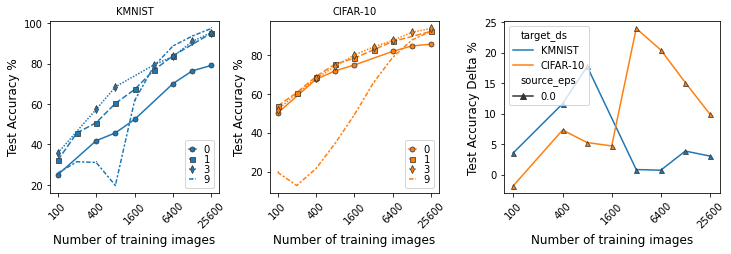

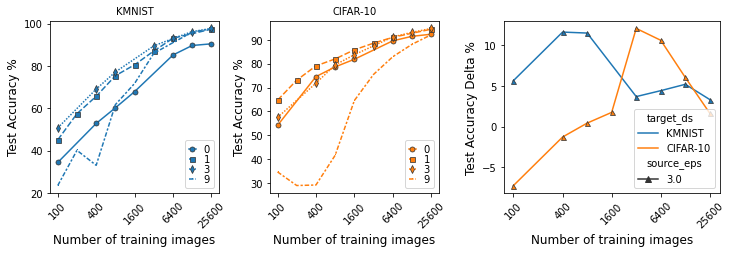

In [27]:
make_dataset_1plot(0,full_df)
make_dataset_1plot(3,full_df)


c:\Users\Admin\Desktop\comp-551-A4\venv\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
c:\Users\Admin\Desktop\comp-551-A4\venv\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


8
13
0
8
12
0


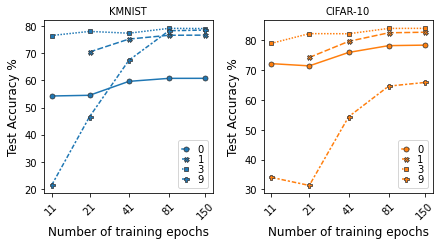

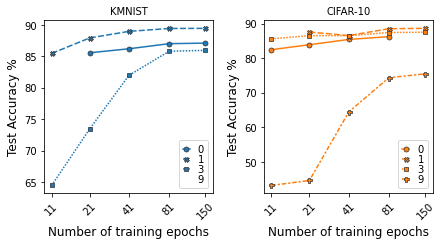

In [7]:
make_dataset_1plot_epoch(0,full_df)
make_dataset_1plot_epoch(3,full_df)

# Experiment 1 - KMNIST 0,1,3,9 blocks adverserial and natural models


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


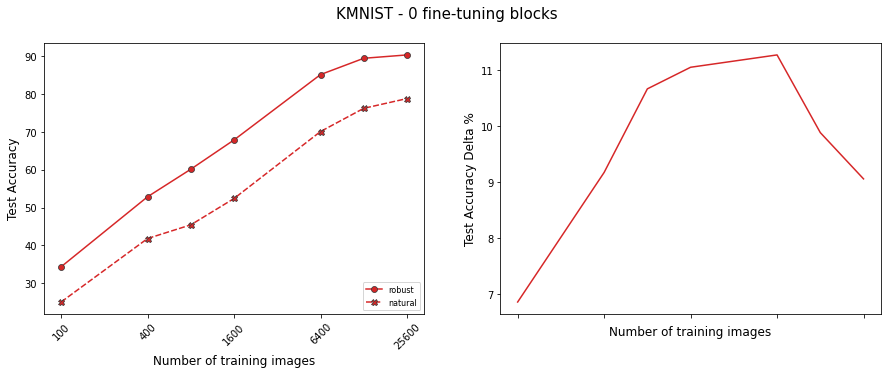

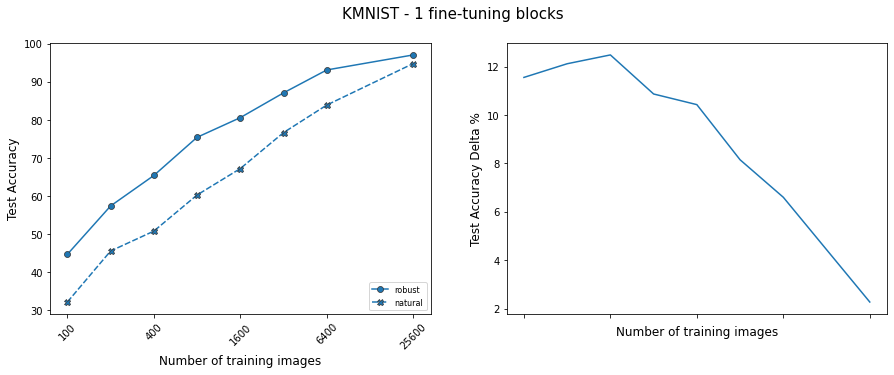

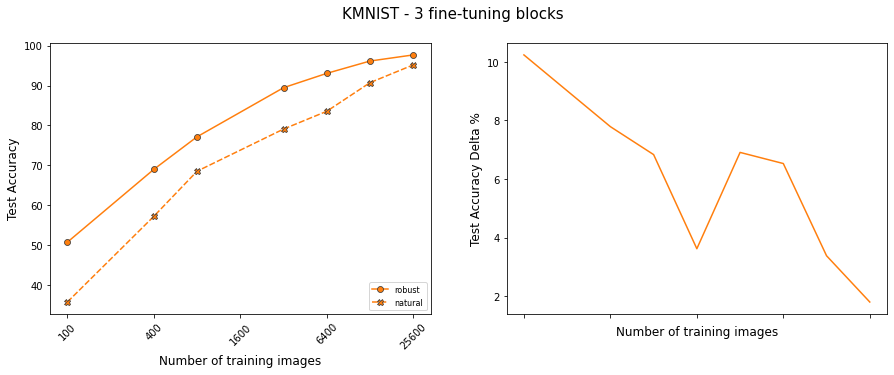

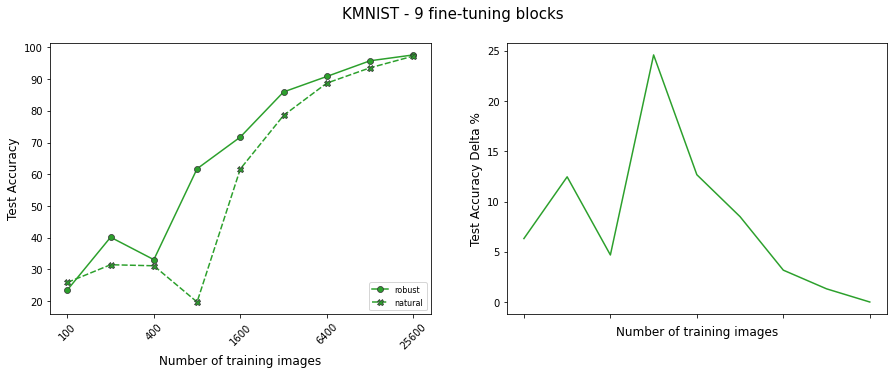

In [323]:
make_dataset_plot(0,full_df_0b,'KMNIST', palette[3])
make_dataset_plot(1,full_df_1b,'KMNIST', palette[0])
make_dataset_plot(3,full_df_3b,'KMNIST', palette[1])
make_dataset_plot(9,full_df_9b,'KMNIST', palette[2])


## Experiment 2 - CIFAR-10 test accuracy vs subset size, 0,1,3,9 blocks adversial vs natural models

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


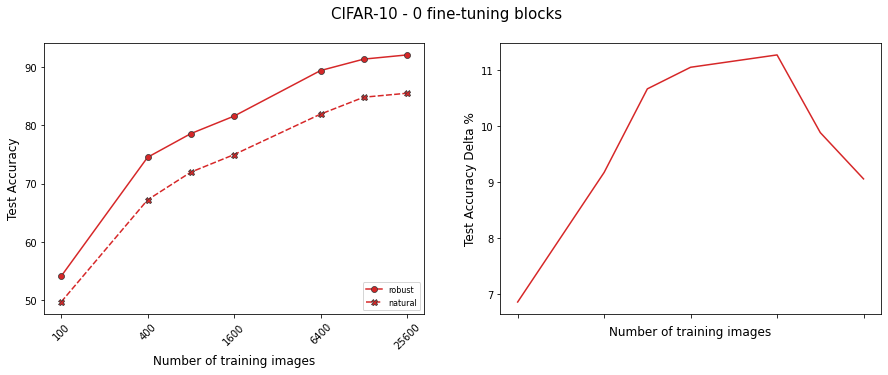

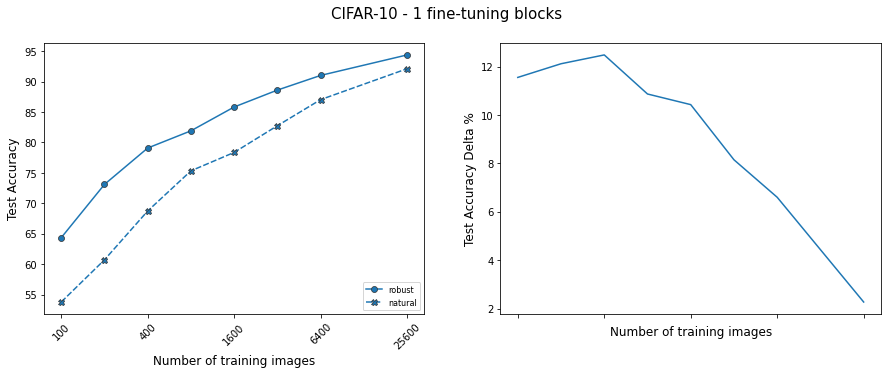

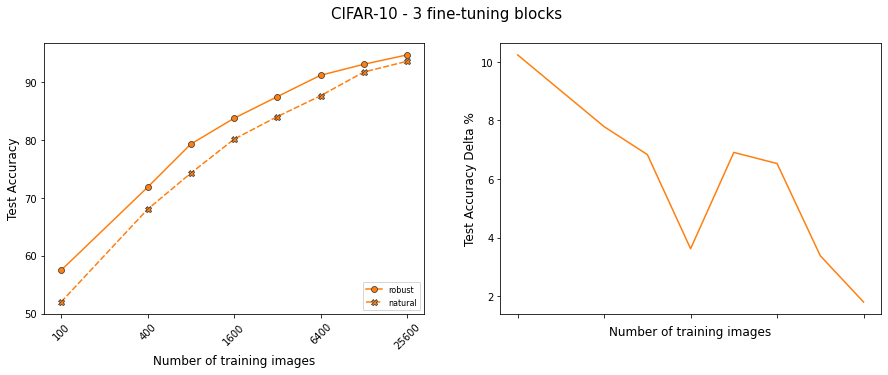

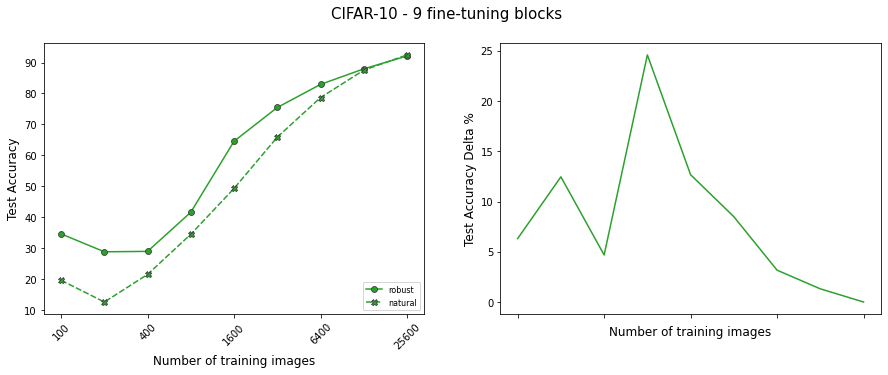

In [324]:
make_dataset_plot(0,full_df_0b,'CIFAR-10', palette[3])
make_dataset_plot(1,full_df_1b,'CIFAR-10', palette[0])
make_dataset_plot(3,full_df_3b,'CIFAR-10', palette[1])
make_dataset_plot(9,full_df_9b,'CIFAR-10', palette[2])

### Experiment 3: Number of epochs for kmnist and cifar - 1,3,9 blocks

8
8
10
10
10
10
8
8
10
10
10
10


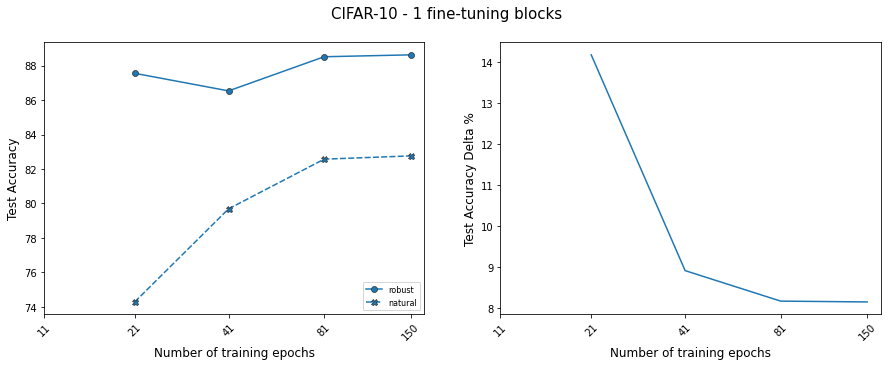

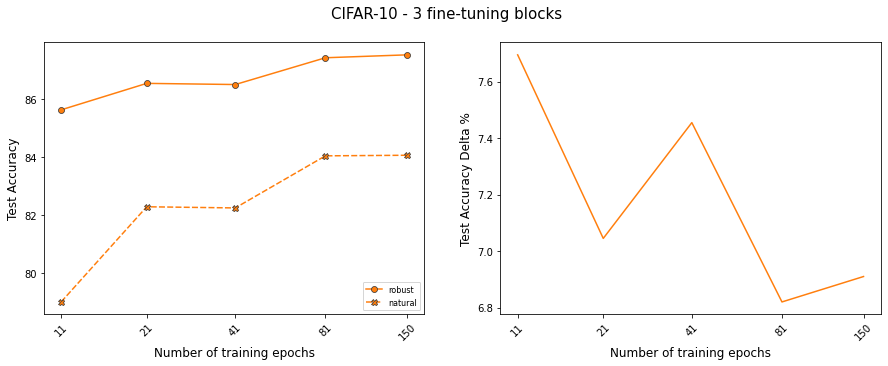

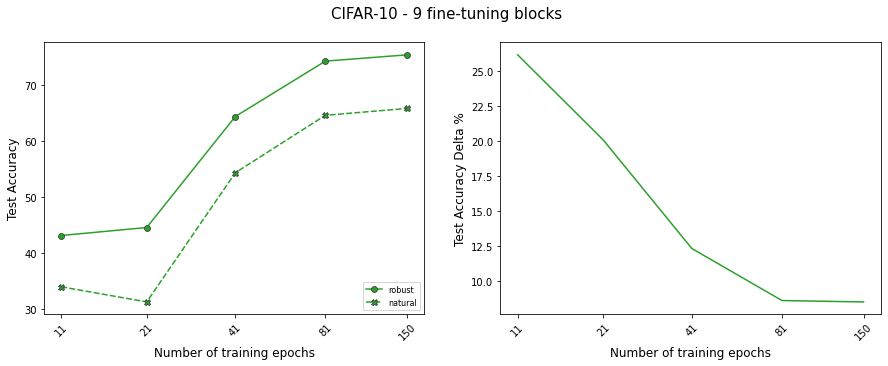

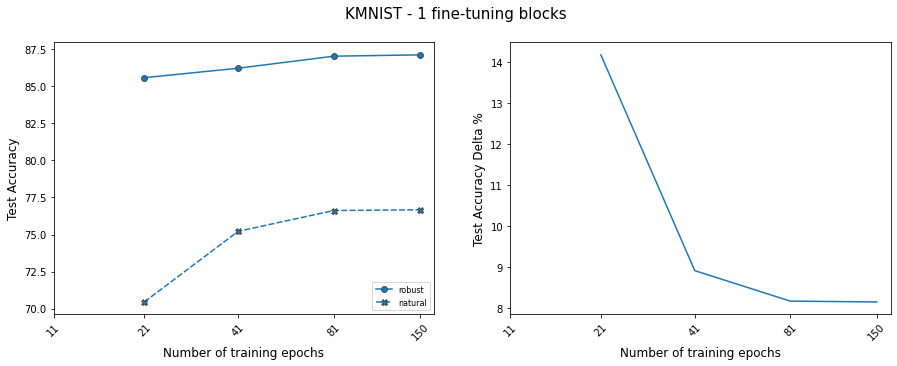

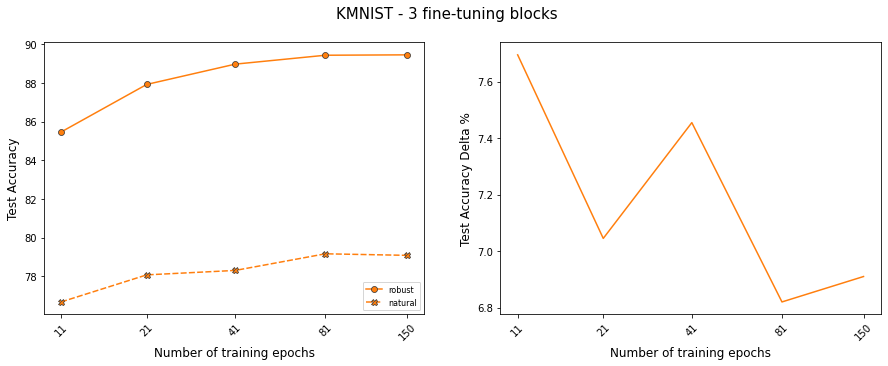

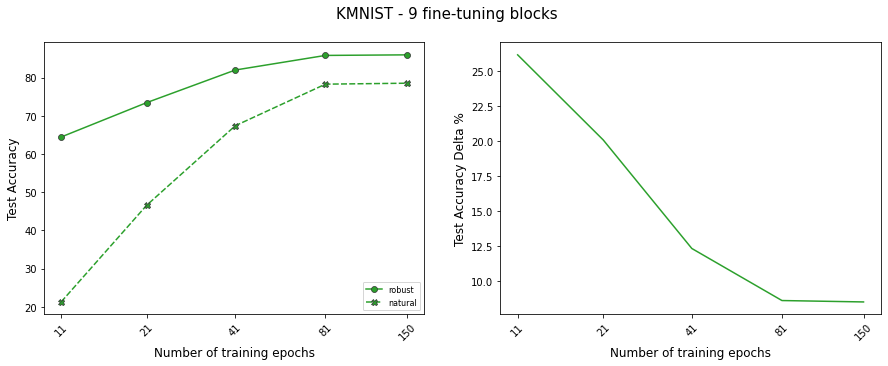

In [325]:
#make_dataset_plot_epoch(0,full_df_0b,'CIFAR-10', palette[3])
make_dataset_plot_epoch(1,full_df_1b,'CIFAR-10', palette[0])
make_dataset_plot_epoch(3,full_df_3b,'CIFAR-10', palette[1])
make_dataset_plot_epoch(9,full_df_9b,'CIFAR-10', palette[2])


#make_dataset_plot_epoch(0,full_df_0b,'KMNIST', palette[3])
make_dataset_plot_epoch(1,full_df_1b,'KMNIST', palette[0])
make_dataset_plot_epoch(3,full_df_3b,'KMNIST', palette[1])
make_dataset_plot_epoch(9,full_df_9b,'KMNIST', palette[2])